In [19]:
from deepRadarModelModConv_Ku_trained import *

In [21]:
yp=model(x_test[:,-60:])
         
yp=yp.numpy()[:,0]*yp.numpy()[:,1]
y_testp=y_test[:,0]*piaKu[ind_test]
stats1=[]
for intv in [[1,2],[2,4],[4,6],[6,8],[8,10],[10,20]]:
    a=np.nonzero((y_testp-intv[0])*(y_testp-intv[1])<0)
    rms=(((yp[a[0]]-y_testp[a[0]])**2).mean())**0.5/y_testp[a[0]].mean()
    #print("%6.2f %6.2f %6.2f %6.2f"%(intv[0],intv[1],\
    #                                 (-1+yp[a[0]].mean()/y_testp[a[0]].mean())*100,rms*100))
    stats1.append([intv[0],intv[1],\
                                     (-1+yp[a[0]].mean()/y_testp[a[0]].mean())*100,rms*100])
stats2=[]
yp_2=model(x_test[:,-40:])
yp=yp_2.numpy()[:,0]*piaKu[ind_test]
piaP=yp_2.numpy()[:,1]
y_testp=y_test[:,0]*piaKu[ind_test]
for intv in [[1,2],[2,4],[4,6],[6,8],[8,10],[10,20]]:
    a=np.nonzero((y_testp-intv[0])*(y_testp-intv[1])<0)
    rms=(((yp[a[0]]-y_testp[a[0]])**2).mean())**0.5/y_testp[a[0]].mean()
    #print("%6.2f %6.2f %6.2f %6.2f %6.2f %6.2f"%(intv[0],intv[1],\
    #                                             (-1+yp[a[0]].mean()/y_testp[a[0]].mean())*100,rms*100,\
    #                                             piaP[a[0]].mean(),piaKu[ind_test][a].mean()))
    stats2.append([intv[0],intv[1],(-1+yp[a[0]].mean()/y_testp[a[0]].mean())*100,rms*100,\
                   piaP[a[0]].mean(),piaKu[ind_test][a].mean()])
stats1=np.array(stats1)
stats2=np.array(stats2)

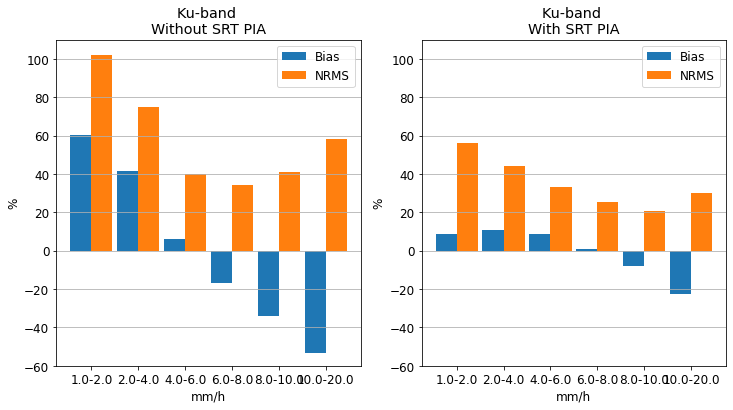

In [24]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.bar(np.arange(6)-0.225,stats1[:6,2],0.45,label='Bias')
plt.bar(np.arange(6)+0.225,stats1[:6,3],0.45,label='NRMS')
plt.xticks(range(6),('1.0-2.0','2.0-4.0','4.0-6.0','6.0-8.0','8.0-10.0','10.0-20.0'))
plt.ylabel('%')
plt.legend()
plt.gca().yaxis.grid()
plt.title("Ku-band \nWithout SRT PIA")
plt.xlabel('mm/h')
plt.ylim(-60,110)
#plt.figure(figsize=(6,6))
plt.subplot(122)
plt.bar(np.arange(6)-0.225,stats2[:6,2],0.45,label='Bias')
plt.bar(np.arange(6)+0.225,stats2[:6,3],0.45,label='NRMS')
plt.xticks(range(6),('1.0-2.0','2.0-4.0','4.0-6.0','6.0-8.0','8.0-10.0','10.0-20.0'))
plt.ylabel('%')
plt.legend()
plt.gca().yaxis.grid()
plt.title("Ku-band \nWith SRT PIA")
plt.ylim(-60,110)
plt.xlabel('mm/h')
plt.savefig("kuBand_inclined_GPM_assessment.png")